# Statistics on missing CA and CB atoms AND side chain angles

## Aims of this notebook

### 1. Missing CA and CB atoms

In our fingerprint, both the exposure and side chain angle features are dependent on CA and CB atoms.
Here, we investigate where and overall how often these atoms are missing in the KLIFS data.

1. Get for each KLIFS molecule CA and CB atom coordinates per residue position.
2. Calculate missing atom rate per residue position: CA, CB and CA+CB missing.

### 2. Side chain angle (SCA) distribution

Side chain angles describe the angle between Ca, Cb, and residue centroid (without backbone atoms and hydrogens). 

Small amino acids (with tiny side chains) should not show much angle diversion (with smaller angles), larger ones should (with larger angles).

1. Calculate for each amino acid the angle distribution.
2. Save molecule and residue code for each angle, in order to trace back interesting angles.
3. Check diversity of angles per amino acid. If no diversity observed, side chain angle might not be such a good measure, since it does not depend on structural conformation but solely on amino acid type.

## Imports

In [11]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%autoreload 2

In [13]:
from pathlib import Path
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../..')
from kinsim_structure.auxiliary import KlifsMoleculeLoader
from kinsim_structure.analysis import GapRate, SideChainAngleGenerator, SideChainAngleAnalyser

sns.set()
%matplotlib inline

In [14]:
warnings.filterwarnings(action='once')

## IO paths

In [15]:
path_to_kinsim = Path('.') / '..' / '..'
path_to_data = path_to_kinsim / 'examples' / 'data'
path_to_results = path_to_kinsim / 'examples' / 'results' / 'features' / 'sca_centroid_wo_backbone' 

## Load KLIFS metadata

In [16]:
klifs_metadata = pd.read_csv(path_to_data / 'postprocessed' / 'klifs_metadata_postprocessed.csv' , index_col=0)

In [17]:
klifs_metadata.shape

(3878, 23)

## Data generation

### Gap rate

In [18]:
gap_rate = GapRate(klifs_metadata)

### Side chain angle

## Data analysis

### Gap rate

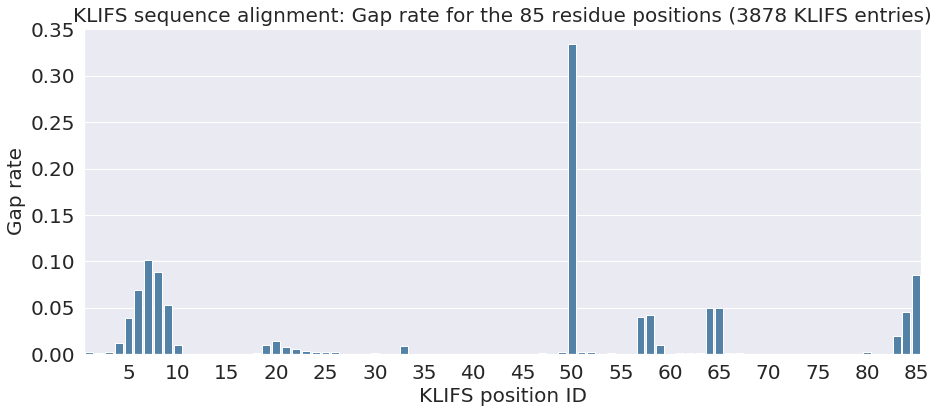

In [25]:
gap_rate.plot_gap_rate(
    path_to_results
)

### Missing CA and CB atoms

In [27]:
side_chain_angle_analyser = SideChainAngleAnalyser()
side_chain_angle_analyser.load_data(path_to_results / 'side_chain_angles.p')

In [28]:
side_chain_angle_analyser.data.head()

,klifs_id,residue_id,residue_name,ca,cb,centroid,sca,klifs_code
1,1,50,GLU,"<Vector -3.20, -23.46, -71.05>","<Vector -2.63, -22.05, -70.79>","<Vector -1.47, -20.92, -69.66>",146.52,HUMAN/AAK1_4wsq_altA_chainB
2,2,51,VAL,"<Vector -5.75, -22.67, -73.74>","<Vector -7.30, -22.87, -73.72>","<Vector -7.63, -23.19, -74.05>",130.54,HUMAN/AAK1_4wsq_altA_chainB
3,3,52,LEU,"<Vector -4.47, -19.59, -75.71>","<Vector -3.26, -19.64, -76.63>","<Vector -1.92, -19.80, -76.05>",119.68,HUMAN/AAK1_4wsq_altA_chainB
4,4,53,ALA,"<Vector -7.51, -18.97, -77.92>","<Vector -7.14, -17.87, -78.92>","<Vector -7.14, -17.87, -78.92>",180.00,HUMAN/AAK1_4wsq_altA_chainB
5,5,54,GLU,"<Vector -10.51, -20.69, -79.50>","<Vector -11.48, -21.24, -78.46>","<Vector -11.48, -21.24, -78.46>",180.00,HUMAN/AAK1_4wsq_altA_chainB


In [29]:
side_chain_angle_analyser.data.shape

(325170, 8)

In [31]:
side_chain_angle_analyser.get_missing_residues_ca_cb(gap_rate)

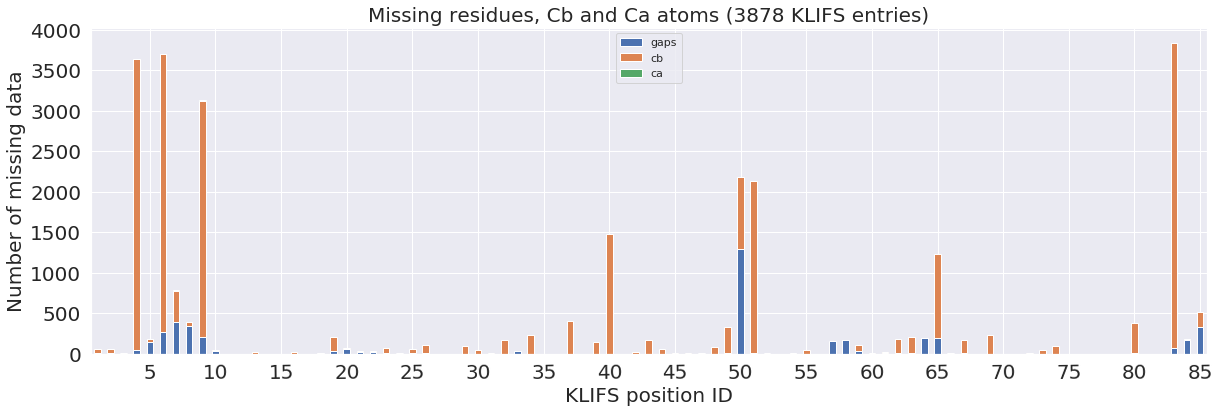

In [32]:
side_chain_angle_analyser.plot_missing_residues_ca_cb(
    path_to_results
)

In [33]:
# How many residues have a missing Cb but are not GLY?
side_chain_angle_analyser.data[
    (side_chain_angle_analyser.data.cb.isna()) &
    (side_chain_angle_analyser.data.residue_name != 'GLY')
].shape

(50, 8)

### SCA angle distribution

Plotting standard amino acids (violin)...


/home/dominique/anaconda3/envs/kinsim/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


Plotting non-standard amino acids (violin)...


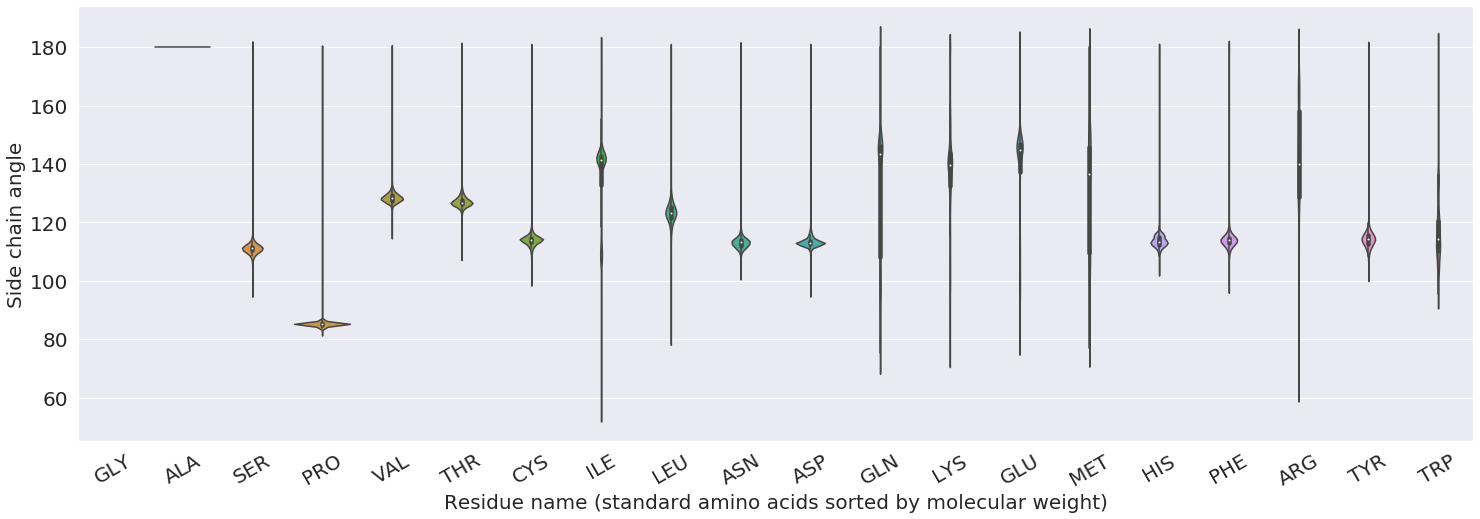

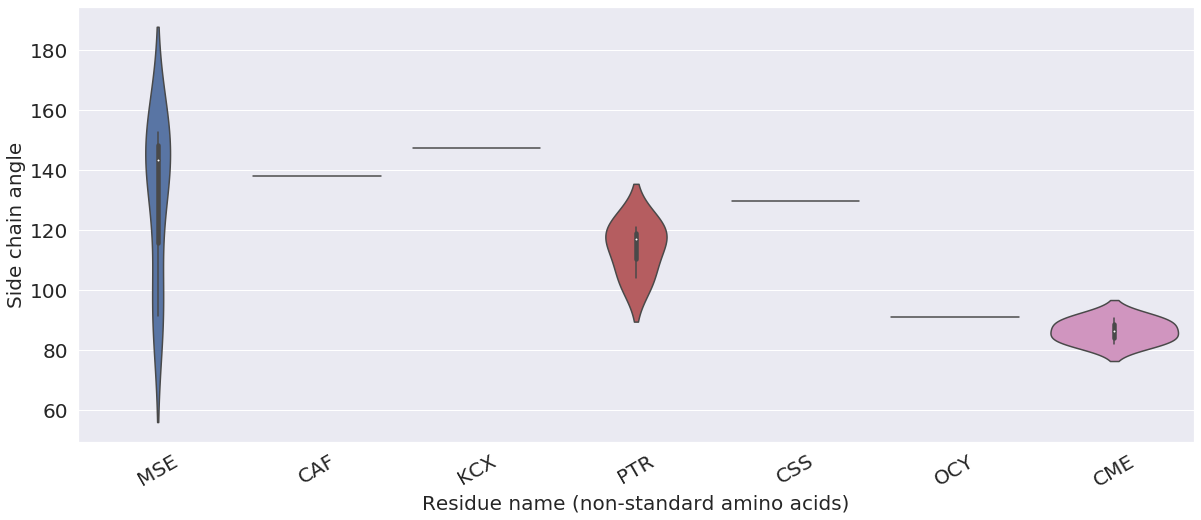

In [34]:
side_chain_angle_analyser.plot_side_chain_angle_distribution(
    path_to_results, 
    kind='violin'
)

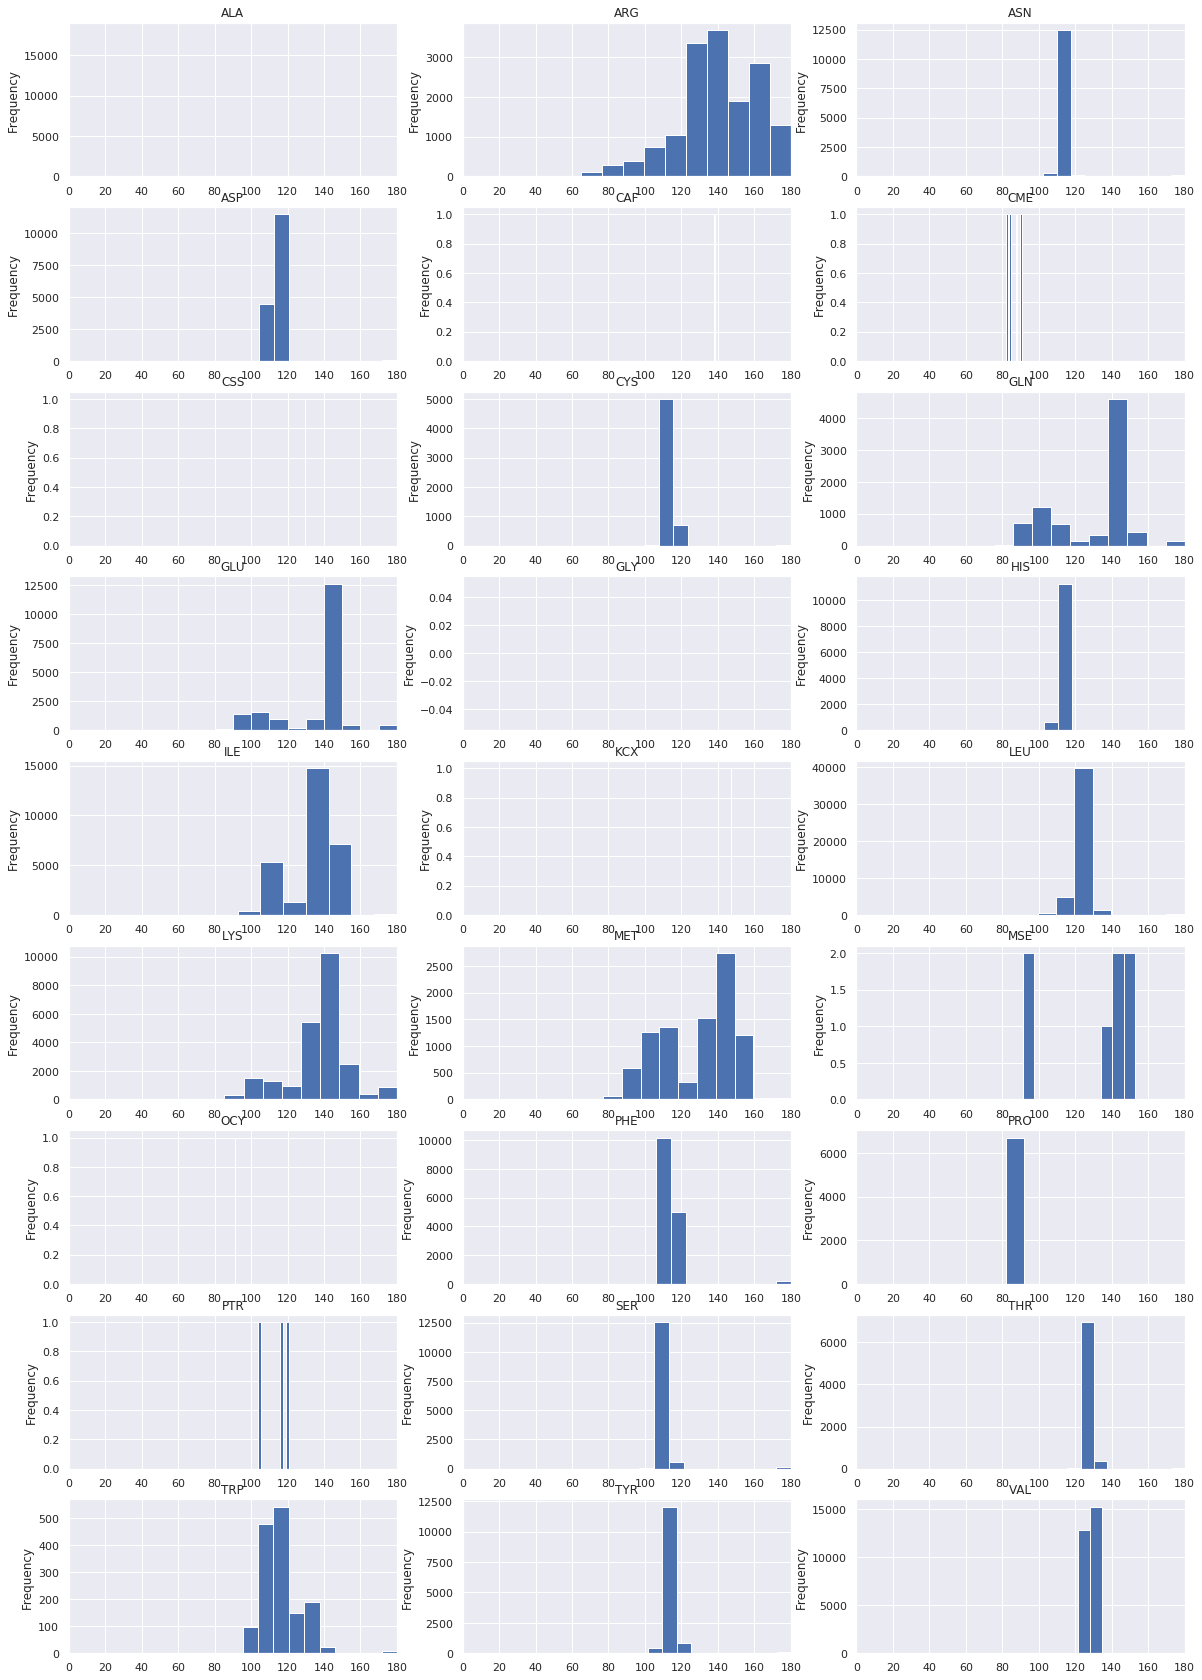

In [36]:
side_chain_angle_analyser.plot_side_chain_angle_distribution(
    path_to_results, 
    kind='histograms'
)

### SCA statistics

In [37]:
side_chain_angle_analyser.data[['residue_name', 'sca']].groupby('residue_name').describe()

sca                                                    \
                count        mean        std     min       25%      50%   
residue_name                                                              
ALA           18149.0  180.000000   0.000000  180.00  180.0000  180.000   
ARG           15642.0  140.196646  21.739771   65.00  128.6825  139.910   
ASN           12959.0  113.484287   5.664478  102.19  111.9600  113.120   
ASP           15986.0  113.439343   3.887336   95.69  112.5000  112.970   
CAF               1.0  138.050000        NaN  138.05  138.0500  138.050   
CME               4.0   86.390000   3.850316   82.14   83.8800   86.300   
CSS               1.0  129.710000        NaN  129.71  129.7100  129.710   
CYS            5748.0  114.044793   3.137069   99.45  113.1600  114.065   
GLN            8241.0  131.275094  21.699139   75.31  108.1800  143.480   
GLU           18807.0  136.700506  19.082929   80.04  137.1500  144.690   
GLY               0.0         NaN        NaN     NaN       NaN      NaN   
HIS           11926.0  113.715528   3.755070  102.95  112.3525  113.410   
ILE           28929.0  134.597843  13.448263   55.25  132.8600  141.200   
KCX               1.0  147.240000        NaN  147.24  147.2400  147.240   
LEU           46359.0  123.220174   4.647830   79.17  121.3700  123.300   
LYS           23569.0  137.093524  16.719989   74.92  132.5000  139.690   
MET            9123.0  128.909604  20.040972   77.07  109.6400  136.560   
MSE               7.0  130.777143  26.007939   91.17  115.5800  143.490   
OCY               1.0   91.010000        NaN   91.01   91.0100   91.010   
PHE           15372.0  114.576939   7.345561   98.00  112.8500  113.860   
PRO            6702.0   85.266415   1.720719   81.83   84.9500   85.320   
PTR               3.0  113.946667   8.972632  103.86  110.4000  116.940   
SER           13263.0  111.612616   6.568119   96.49  110.3900  111.080   
THR            7420.0  127.393654   4.467638  108.58  126.1600  126.770   
TRP            1487.0  116.568258  10.437031   95.37  110.0750  114.410   
TYR           13485.0  114.584911   6.110624  101.75  112.7300  114.220   
VAL           28297.0  128.546948   2.661624  115.20  127.4400  128.300   

                                
                   75%     max  
residue_name                    
ALA           180.0000  180.00  
ARG           158.2375  180.00  
ASN           113.9400  180.00  
ASP           113.7200  180.00  
CAF           138.0500  138.05  
CME            88.8100   90.82  
CSS           129.7100  129.71  
CYS           114.7900  180.00  
GLN           146.1400  180.00  
GLU           146.8500  180.00  
GLY                NaN     NaN  
HIS           114.9800  180.00  
ILE           142.5600  180.00  
KCX           147.2400  147.24  
LEU           125.2400  180.00  
LYS           143.6200  180.00  
MET           145.6600  180.00  
MSE           148.4950  152.63  
OCY            91.0100   91.01  
PHE           114.7700  180.00  
PRO            85.5800  180.00  
PTR           118.9900  121.04  
SER           111.7300  180.00  
THR           127.8300  180.00  
TRP           120.6000  180.00  
TYR           115.5700  180.00  
VAL           129.3400  180.00

Look at extreme (unexpected values)...

In [38]:
side_chain_angle_analyser.data[
    (side_chain_angle_analyser.data.residue_name == 'TYR') & (side_chain_angle_analyser.data.sca == 180)
].head()

,klifs_id,residue_id,residue_name,ca,cb,centroid,sca,klifs_code
12,12,303,TYR,"<Vector -46.93, 49.64, -12.34>","<Vector -45.69, 49.88, -13.22>","<Vector -45.69, 49.88, -13.22>",180.0,HUMAN/ABL2_2xyn_altA_chainA
42,42,207,TYR,"<Vector 213.93, 17.99, -95.24>","<Vector 213.80, 16.49, -95.08>","<Vector 213.80, 16.49, -95.08>",180.0,HUMAN/AurA_1ol6_chainA
41,41,199,TYR,"<Vector -4.74, 19.70, 66.58>","<Vector -6.17, 19.19, 66.72>","<Vector -6.17, 19.19, 66.72>",180.0,HUMAN/AurA_5aad_chainA
41,41,199,TYR,"<Vector 4.87, -19.25, -18.72>","<Vector 6.26, -18.68, -18.44>","<Vector 6.26, -18.68, -18.44>",180.0,HUMAN/AurA_5aae_chainA
41,41,199,TYR,"<Vector -3.83, 19.51, -18.04>","<Vector -5.27, 19.12, -17.69>","<Vector -5.27, 19.12, -17.69>",180.0,HUMAN/AurA_5aag_chainA


### Visualize SCAs

In [43]:
import time

import nglview as nv

from kinsim_structure.auxiliary import split_klifs_code

In [44]:
sca_data_grouped = list(side_chain_angle_analyser.data.groupby('klifs_code'))
sca_data = sca_data_grouped[1][1]

In [47]:
def create_viewer(sca_data):

    klifs_code = split_klifs_code(sca_data.klifs_code.iloc[0])

    pdb_id = klifs_code['pdb_id']
    chain = klifs_code['chain']

    viewer = nv.NGLWidget()
    viewer.add_pdbid(pdb_id)
    viewer.add_representation(repr_type='cartoon', selection='all')
    viewer.remove_ball_and_stick()

    return viewer

In [48]:
def show_sca_features(viewer, sca_data): 

    klifs_code = split_klifs_code(sca_data.klifs_code.iloc[0])

    pdb_id = klifs_code['pdb_id']
    chain = klifs_code['chain']
    
    # Representation parameters
    sphere_radius = 0.3

    colors = {
        'ca': [1, 0, 0],
        'cb': [0, 1, 0],
        'centroid': [0, 0, 1]
    }

    # Show side chain angle feature per residue
    for index, row in sca_data.iterrows():

        res_id = row.residue_id

        try:
            ca = list(row.ca.get_array())
        except AttributeError:
            pass

        try:
            cb = list(row.cb.get_array())
        except AttributeError:
            pass

        try:
            centroid = list(row.centroid.get_array())
        except AttributeError:
            pass

        selection = f'{res_id}:{chain}'

        viewer.add_representation(repr_type='line', selection=selection)
        viewer.shape.add_sphere(ca, colors['ca'], sphere_radius)
        viewer.shape.add_sphere(cb, colors['cb'], sphere_radius)
        viewer.shape.add_sphere(centroid, colors['centroid'], sphere_radius)

In [49]:
def center_on(viewer, sca_data, res_id):
    
    klifs_code = split_klifs_code(sca_data.klifs_code.iloc[0])

    pdb_id = klifs_code['pdb_id']
    chain = klifs_code['chain']
    
    selection = f'{res_id}:{chain}'
        
    viewer.remove_ball_and_stick()
    viewer.add_ball_and_stick(selection=selection)
    viewer.center(selection=selection)

In [51]:
viewer = create_viewer(sca_data)
viewer

NGLWidget()

In [ ]:
show_sca_features(viewer, sca_data)

In [ ]:
center_on(viewer, sca_data, 1121)

### SCA mean and median

Get mean and median of side chain angles per amino acid and save to file. 
Use these values for residues with missing Ca/Cb atoms.

In [ ]:
side_chain_angle_analyser.get_mean_median(
    from_file=path_to_results / 'stats_missing_ca_cb_and_sca.p'
)